In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%matplotlib inline

In [8]:
import torchvision
import tensorflow as tf
import os
import torch
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from torch import nn

In [5]:
import sys
sys.path.insert(0, '../.')

In [13]:
from models.pytorch_to_tf import *
from models.aux_models.discriminator import *

In [543]:
c = model.conv1
padding = 'VALID' if c.padding[0] is 0 else 'SAME'
padding = 'valid'
k_model = keras.models.Sequential()
k_model.add(keras.layers.ZeroPadding2D(padding=(3, 3), input_shape=(224, 224, 3)))
k_model.add(keras.layers.Conv2D(c.out_channels, c.kernel_size, 
                                    strides=[c.stride[0], c.stride[1]],
                                    padding=padding,
                                    kernel_initializer=tf.constant_initializer(c.weight.data.numpy().transpose([2, 3, 1, 0])),
                                   use_bias=c.bias))

In [544]:
k_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 230, 230, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      9408      
Total params: 9,408
Trainable params: 9,408
Non-trainable params: 0
_________________________________________________________________


In [545]:
image1 = mpimg.imread('../images/zebra.jpeg')
image1 = cv2.resize(image1, (224, 224))

images = np.array([image1]) / 255.0
conv_out = k_model.predict(images)

In [546]:
conv_out.shape

(1, 112, 112, 64)

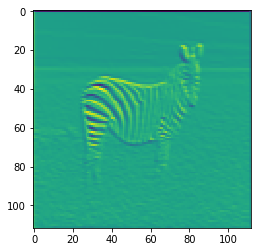

In [547]:
plt.imshow(conv_out[0, :, :, 1])

In [548]:
p_model = torch.nn.Sequential(
          torch.nn.Conv2d(in_channels=3, out_channels=64, bias=False, kernel_size=7, padding=3, stride=3)
        )

In [549]:
conv1 = next(p_model.children())

In [550]:
conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(3, 3), padding=(3, 3), bias=False)

In [551]:
conv1.weight.data = model.conv1.weight.data

In [552]:
p_model.eval()
image1 = mpimg.imread('../images/zebra.jpeg')
image1 = cv2.resize(image1, (224, 224))
images = np.array([image1]) / 255.0
data = np.transpose(images, (0, 3, 1, 2))
data = torch.from_numpy(data).float()
preds = p_model(data).data.numpy()
preds.shape

(1, 64, 75, 75)

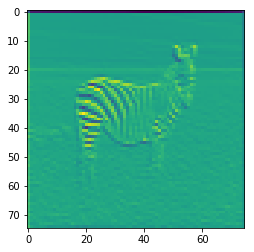

In [553]:
plt.imshow(preds[0, 1, :, :])

In [137]:
model.conv1.weight.data.numpy().shape

(64, 3, 7, 7)

In [139]:
model.conv1.bias

In [37]:
model = get_torch_model()
model.eval()

image1 = mpimg.imread('../../images/cat_1.jpeg')
image1 = cv2.resize(image1, (224, 224))
images = np.array([image1]) / 255.0

data = np.transpose(images, (0, 3, 1, 2))
data = torch.from_numpy(data).float()

# data = torch.randn(1, 3, 224, 224) # Load your data here, this is just dummy data
output = model(data)
# prediction = torch.argmax(output)
prediction = output.data.numpy()[0]
print(np.argmax(prediction))

281


In [38]:
tf.reset_default_graph()

image_input = tf.placeholder(tf.float32, [None, None, None, 3], name='image_input')

resnet = Discriminator()
resnet.build_model(image_input)

image1 = mpimg.imread('../../images/car.jpeg')
image1 = cv2.resize(image1, (224, 224))

images = np.array([image1]) / 255.0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    logits = sess.run([resnet.fc], feed_dict={'image_input:0': images})
    # print(logits)
    print(np.argmax(logits[0]))
#     sm = sess.run(tf.nn.softmax(logits))
#     sm_p = sess.run(tf.nn.softmax(prediction))
#     sm1 = sess.run(tf.nn.top_k(sm, k=20))
#     sm2 = sess.run(tf.nn.top_k(sm_p, k=20))


Tensor("network_discriminator/global_average_pooling2d/Mean:0", shape=(?, 512), dtype=float32)
817


In [22]:
resnet.fc.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None), Dimension(1000)])

In [6]:
part_model = nn.Sequential(*list(model.children())[:1])
part_model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
)

In [7]:
part_model.eval()

image1 = mpimg.imread('../images/zebra.jpeg')
image1 = cv2.resize(image1, (224, 224))
images = np.array([image1]) / 255.0

data = np.transpose(images, (0, 3, 1, 2))
data = torch.from_numpy(data).float()

# data = torch.randn(1, 3, 224, 224) # Load your data here, this is just dummy data
output = part_model(data)
# # prediction = torch.argmax(output)
# prediction = output.data.numpy()[0]
# print(np.argmax(prediction))

In [255]:
output.shape

torch.Size([1, 64, 112, 112])

In [8]:
output = output.data.numpy()

In [395]:
np.max(output)

6.6021976

In [396]:
np.min(output)

-5.7325506

In [298]:
model.conv1.weight.data.numpy().shape

(64, 3, 7, 7)

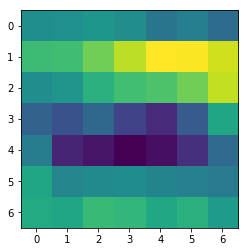

In [9]:
plt.imshow(model.conv1.weight.data.numpy()[1, 0, :, :])

In [416]:
np.max(model.conv1.weight.data.numpy()[:, :, :, :]), np.min(model.conv1.weight.data.numpy()[:, :, :, :])

(1.0164733, -0.8433799)

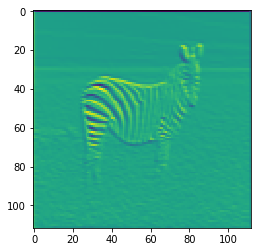

In [10]:
plt.imshow(output[0, 1, :, :])
plt.show()

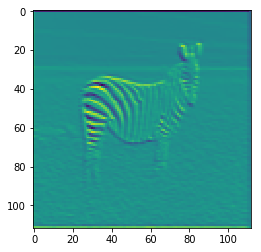

In [500]:
plt.imshow(part_result[0, :, :, 1])
plt.show()

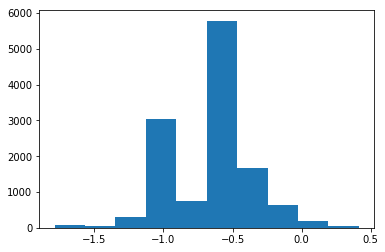

In [470]:
plt.hist(output[0, 12, :, :].reshape((-1)))
plt.show()

In [465]:
output.shape

(1, 64, 112, 112)

In [457]:
part_result.shape

(1, 7, 7, 512)

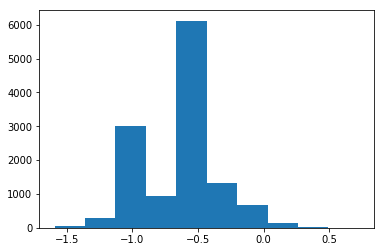

In [471]:
plt.hist(part_result[0, :, :, 12].reshape((-1)))
plt.show()

In [20]:
prediction.shape

(1000,)

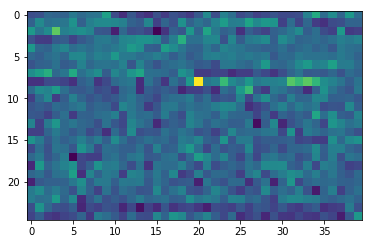

In [11]:
plt.imshow(prediction.reshape((25, 40)))
plt.show()

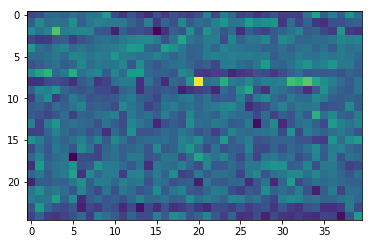

In [13]:
plt.imshow(logits.reshape((25, 40)))
plt.show()

In [22]:
model.conv1.weight.data.numpy().shape

(64, 3, 7, 7)

In [12]:
tf.reset_default_graph()

image_input = tf.placeholder(tf.float32, [None, None, None, 3], name='image_input')

resnet = ResNet_ImageNet()
resnet.build_model(image_input)

image1 = mpimg.imread('../images/zebra.jpeg')
image1 = cv2.resize(image1, (224, 224))

images = np.array([image1]) / 255.0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    part_result, logits = sess.run([resnet.part_result, resnet.fc], feed_dict={'image_input:0': images})
    # print(logits)
    print(np.argmax(logits[0]))
#     sm = sess.run(tf.nn.softmax(logits))
#     sm_p = sess.run(tf.nn.softmax(prediction))
#     sm1 = sess.run(tf.nn.top_k(sm, k=20))
#     sm2 = sess.run(tf.nn.top_k(sm_p, k=20))


340


In [382]:
sm1

TopKV2(values=array([[0.2595242 , 0.1554029 , 0.0297087 , 0.02597439, 0.02466794,
        0.02452248, 0.01936174, 0.01723491, 0.01675923, 0.01646145,
        0.01521188, 0.01463583, 0.0111931 , 0.01044908, 0.00888089,
        0.00859245, 0.00798145, 0.00687994, 0.00598146, 0.00532308]],
      dtype=float32), indices=array([[751, 817, 627, 895, 704, 475, 468, 867, 511, 803, 864, 656, 404,
        479, 717, 436, 581, 705, 660, 586]], dtype=int32))

In [383]:
sm2

TopKV2(values=array([0.46045077, 0.17916493, 0.08336704, 0.04388817, 0.04359034,
       0.03049643, 0.02993128, 0.01495204, 0.01334644, 0.00973508,
       0.00932465, 0.00555058, 0.00311464, 0.0029455 , 0.00265879,
       0.00260877, 0.00259497, 0.00236533, 0.00196524, 0.00190109],
      dtype=float32), indices=array([817, 751, 511, 627, 656, 436, 479, 581, 895, 864, 717, 468, 867,
       609, 404, 654, 475, 704, 354, 705], dtype=int32))

In [351]:
np.max(sm)

0.20278758

In [354]:
np.max(sm_p)

0.46045077

In [409]:
xx = model_vars[0]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    xx = sess.run(xx)

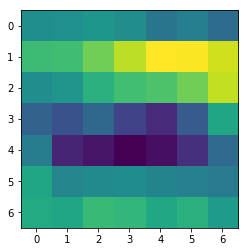

In [414]:
plt.imshow(xx[:, :, 0, 1])

In [415]:
np.max(xx), np.min(xx)

(1.0164733, -0.8433799)

In [262]:
part_result.shape

(1, 112, 112, 64)

In [393]:
np.max(part_result)

5.9211082

In [394]:
np.min(part_result)

-6.2045546

In [408]:
model_vars = tf.trainable_variables()
model_vars

[<tf.Variable 'network/conv2d/kernel:0' shape=(7, 7, 3, 64) dtype=float32>,
 <tf.Variable 'network/batch_normalization/gamma:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'network/batch_normalization/beta:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'network/resblock_10/conv2d_1/kernel:0' shape=(3, 3, 64, 64) dtype=float32>,
 <tf.Variable 'network/resblock_10/batch_normalization/gamma:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'network/resblock_10/batch_normalization/beta:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'network/resblock_10/conv2d_2/kernel:0' shape=(3, 3, 64, 64) dtype=float32>,
 <tf.Variable 'network/resblock_10/batch_normalization_1/gamma:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'network/resblock_10/batch_normalization_1/beta:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'network/resblock_11/conv2d_3/kernel:0' shape=(3, 3, 64, 64) dtype=float32>,
 <tf.Variable 'network/resblock_11/batch_normalization/gamma:0' shape=(64,) dtype=float32_ref>,
 <

In [198]:
def model_summary():
    model_vars = tf.trainable_variables()
    slim.model_analyzer.analyze_vars(model_vars, print_info=True)

model_summary()

---------
Variables: name (type shape) [size]
---------
network/conv2d/kernel:0 (float32 7x7x3x64) [9408, bytes: 37632]
network/batch_normalization/gamma:0 (float32_ref 64) [64, bytes: 256]
network/batch_normalization/beta:0 (float32_ref 64) [64, bytes: 256]
network/resblock_10/conv2d_1/kernel:0 (float32 3x3x64x64) [36864, bytes: 147456]
network/resblock_10/batch_normalization/gamma:0 (float32_ref 64) [64, bytes: 256]
network/resblock_10/batch_normalization/beta:0 (float32_ref 64) [64, bytes: 256]
network/resblock_10/conv2d_2/kernel:0 (float32 3x3x64x64) [36864, bytes: 147456]
network/resblock_10/batch_normalization_1/gamma:0 (float32_ref 64) [64, bytes: 256]
network/resblock_10/batch_normalization_1/beta:0 (float32_ref 64) [64, bytes: 256]
network/resblock_11/conv2d_3/kernel:0 (float32 3x3x64x64) [36864, bytes: 147456]
network/resblock_11/batch_normalization/gamma:0 (float32_ref 64) [64, bytes: 256]
network/resblock_11/batch_normalization/beta:0 (float32_ref 64) [64, bytes: 256]
netwo